In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [2]:
#leo los datos

posicion = pd.read_csv('posicion.dat',  sep='\s+', names=["x", "y", "z"]).to_numpy()
aceleracion = pd.read_csv('aceleracion.dat',  sep='\s+', names=["x", "y", "z"]).to_numpy()
velocidad = pd.read_csv('velocidad.dat',  sep='\s+', names=["x", "y", "z"]).to_numpy()


# Cargo los datos a un unico vector
X = []
for i in range(len(posicion)):
    X.append(np.array([posicion[i][0],   posicion[i][1],   posicion[i][2], 
                      velocidad[i][0],  velocidad[i][1],  velocidad[i][2], 
                    aceleracion[i][0],aceleracion[i][1],aceleracion[i][2]]))

In [3]:
def prediccion_estado (t, x_k, P_k):
    a = (t**2)/2
    B = np.identity(9)
    Q = np.dot (0.3, B)
    A =np.array([[1, 0, 0, t, 0, 0, a, 0, 0],
                 [0, 1, 0, 0, t, 0, 0, a, 0],
                 [0, 0, 1, 0, 0, t, 0, 0, a],
                 [0, 0, 0, 1, 0, 0, t, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, t, 0],
                 [0, 0, 0, 0, 0, 1, 0, 0, t],
                 [0, 0, 0, 0, 0, 0, 1, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0, 1]])
    x_k_1 = np.dot(A, x_k)
    P_k_1 = A.dot(np.dot(P_k, A.T)) + B.dot(Q.dot(B.T))
    
    return x_k_1, P_k_1

In [4]:
def nueva_observacion (X_k_1, zk):
    C =np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 1, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0, 0, 0, 0, 0]])
    
    y_k_1 = np.dot(C,X_k_1) + zk
    return y_k_1

In [5]:
def nueva_observacion_dos_variables (X_k_1, zk):
    C =np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
                 [0, 1, 0, 0, 0, 0, 0, 0, 0],
                 [0, 0, 1, 0, 0, 0, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 1, 0, 0, 0]])
    
    y_k_1 = np.dot(C,X_k_1) + zk
    return y_k_1

In [6]:
#Actualizacion de la medición
def actualizacion_medicion (P_k_1, R, x_k, y_k_1):
    
    C =np.array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 1., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 0., 1., 0., 0., 0., 0., 0., 0.]])

    K = np.dot(P_k_1, C.T).dot(np.linalg.inv (R + C.dot(P_k_1.dot(C.T))))
    

    x_k_1 = x_k + K.dot(y_k_1 - C.dot(x_k))
    return x_k_1, K

In [7]:
#Actualizacion de la medición
def actualizacion_medicion_dos_variables (P_k_1, R, x_k, y_k_1):
    
    C =np.array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 1., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 0., 1., 0., 0., 0., 0., 0., 0.],
                 [0., 0., 0., 1., 0., 0., 0., 0., 0.],
                 [0., 0., 0., 0., 1., 0., 0., 0., 0.],
                 [0., 0., 0., 0., 0., 1., 0., 0., 0.]])

    K = np.dot(P_k_1, C.T).dot(np.linalg.inv (R + C.dot(P_k_1.dot(C.T))))
    

    x_k_1 = x_k + K.dot(y_k_1 - C.dot(x_k))
    return x_k_1, K

In [8]:
def actualizar_estimador (K, P_k):
    I =  np.identity(9)
    C =np.array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 1., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 0., 1., 0., 0., 0., 0., 0., 0.]])
    
    Pk_1 = (I - K.dot(C)).dot(P_k)
    return Pk_1

In [9]:
def actualizar_estimador_dos_variables (K, P_k):
    I =  np.identity(9)
    C =np.array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 1., 0., 0., 0., 0., 0., 0., 0.],
                 [0., 0., 1., 0., 0., 0., 0., 0., 0.],
                 [0., 0., 0., 1., 0., 0., 0., 0., 0.],
                 [0., 0., 0., 0., 1., 0., 0., 0., 0.],
                 [0., 0., 0., 0., 0., 1., 0., 0., 0.]])
    
    Pk_1 = (I - K.dot(C)).dot(P_k)
    return Pk_1

In [10]:
# 1)Se mide la posición afectada por ruido blanco (gaussiano) de 10m de desvío estándar. 
# Posición inicial
x_k = np.array([-10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
    
# Matrix covarianza en la posición cero.
P_k = np.diag(np.array([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01]))

pred_normal = []
obs = []
norma_P_normal = []

for i in range (0, 351):
    zk = np.random.normal(0,10, size=3)   #Error distribución normal
    R  = np.identity(3) * np.array([10,10,10])   #Error distribución normal
    y_k_1 = X[i]
    x_k, P_k = prediccion_estado(i+1, x_k, P_k)
    y_k_1 = nueva_observacion (y_k_1, zk)
    x_k, K = actualizacion_medicion (P_k, R, x_k, y_k_1)
    P_k = actualizar_estimador (K, P_k)
    pred_normal.append(x_k[0:3])
    obs.append(y_k_1[0:3])    
    norma_P_normal.append(np.linalg.norm(P_k))
    

In [11]:
#2) Se mide la posición afectada por ruido blanco (uniforme) de 10m de desvío estándar. Similar 
#al ítem anterior. La idea es comparar con el ítem anterior. Analizar si hubo algún cambio. 
# Posición inicial

x_k = np.array([-10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
    
# Matrix covarianza en la posición cero.
P_k = np.diag(np.array([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01]))

pred_uni = []
obs = []
norma_P_uniforme = []
for i in range (0, 351):
    zk = np.random.uniform(-17.32,17.32,3)     #Error distribución uniforme.
    R  = np.identity(3) * np.array([10,10,10])     
    x_k, P_k = prediccion_estado (i+1, x_k, P_k)
    y_k_1 = X[i]
    y_k_1 = nueva_observacion (y_k_1, zk)
    x_k, K = actualizacion_medicion (P_k, R, x_k, y_k_1)
    P_k = actualizar_estimador (K, P_k)
    pred_uni.append(x_k[0:3])
    obs.append(y_k_1[0:3])
    norma_P_uniforme.append(np.linalg.norm(P_k))



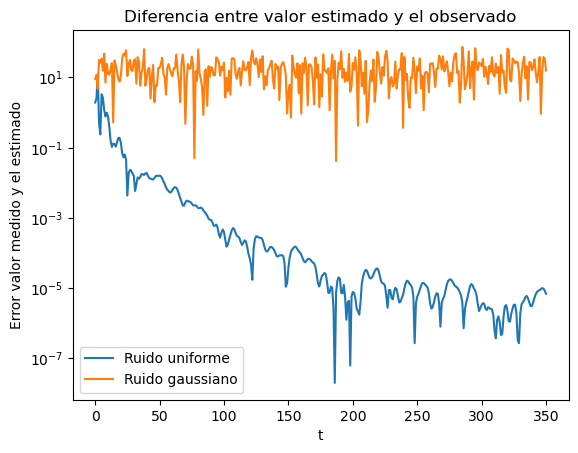

In [12]:
error_uni =    (abs(np.sum(obs,axis=1) - np.sum(pred_uni,axis=1)))
error_normal = (abs(np.sum(obs,axis=1) - np.sum(pred_normal,axis=1)))
plt.plot(error_uni, label="Ruido uniforme")
plt.plot(error_normal, label="Ruido gaussiano")
plt.legend(loc="lower left")
plt.title("Diferencia entre valor estimado y el observado")
plt.xlabel("t")
plt.ylabel("Error valor medido y el estimado")
plt.yscale("log")
plt.show()

In [13]:
x_pred_normal = []
y_pred_normal = []
z_pred_normal = []

x_pred_uni = []
y_pred_uni = []
z_pred_uni = []

x_obs = []
y_obs = []
z_obs = []

for i in range(0,351):
    x_pred_normal.append(pred_normal[i][0])
    y_pred_normal.append(pred_normal[i][1])
    z_pred_normal.append(pred_normal[i][2])

    x_pred_uni.append(pred_uni[i][0])
    y_pred_uni.append(pred_uni[i][1])
    z_pred_uni.append(pred_uni[i][2])
    
    x_obs.append(obs[i][0])
    y_obs.append(obs[i][1])
    z_obs.append(obs[i][2])


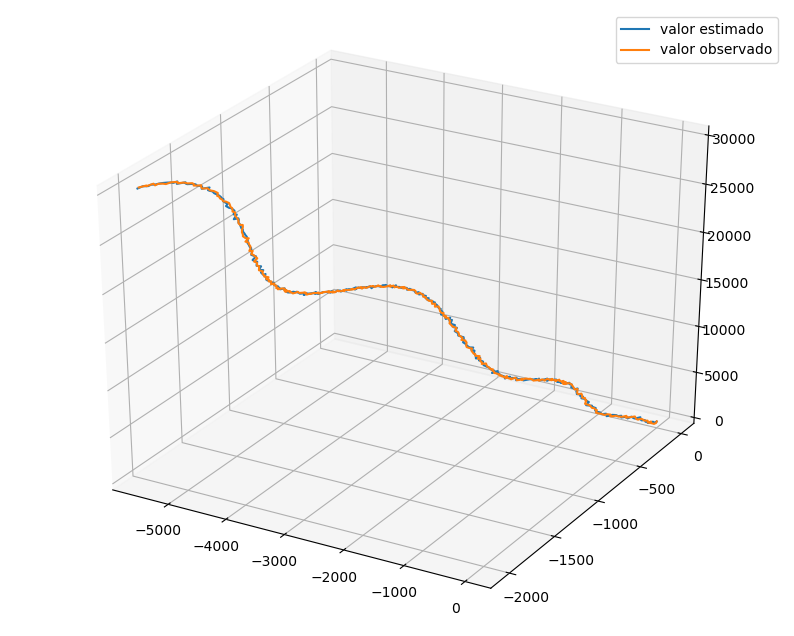

In [14]:
fig = plt.figure(figsize=(10,8), dpi= 100)
ax = fig.gca(projection='3d')
ax.plot(x_pred_normal, y_pred_normal, z_pred_normal, label='valor estimado')
ax.plot(x_obs, y_obs, z_obs, label='valor observado')

ax.legend()

plt.show()


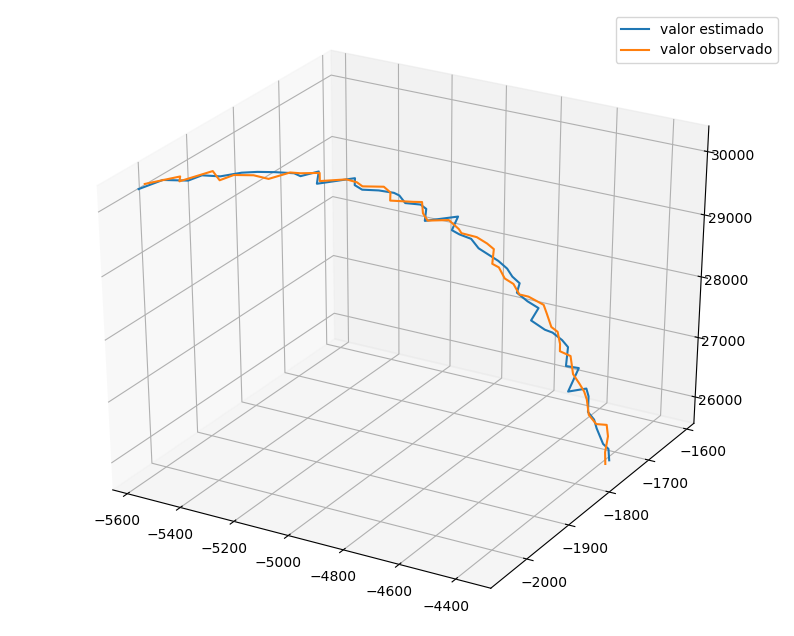

In [17]:
fig = plt.figure(figsize=(10,8), dpi= 100)
ax = fig.gca(projection='3d')
ax.plot(x_pred_normal[300:351], y_pred_normal[300:351], z_pred_normal[300:351], label='valor estimado')
ax.plot(x_obs[300:351], y_obs[300:351], z_obs[300:351], label='valor observado')

ax.legend()

plt.show()

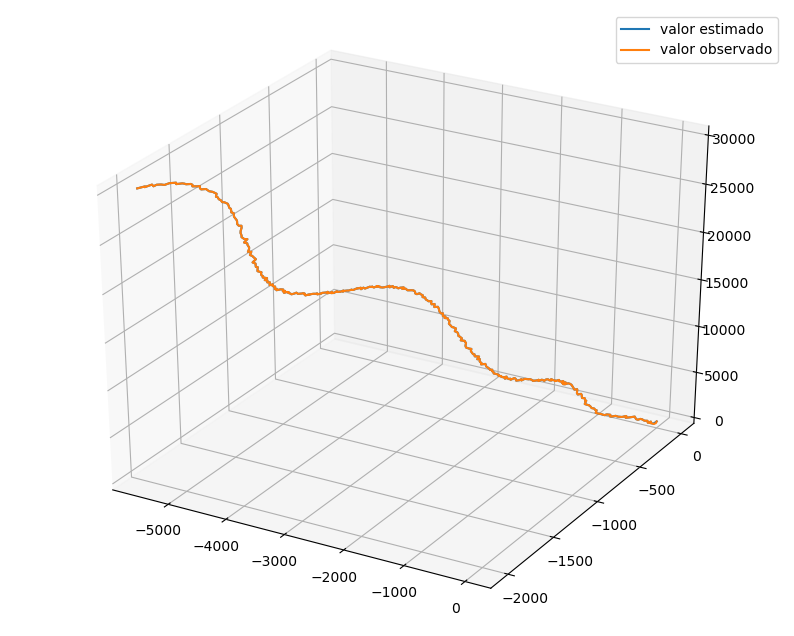

In [18]:
fig = plt.figure(figsize=(10,8), dpi= 100)
ax = fig.gca(projection='3d')

ax.plot(x_pred_uni, y_pred_uni, z_pred_uni, label='valor estimado')
ax.plot(x_obs, y_obs, z_obs, label='valor observado')

ax.legend()

plt.show()

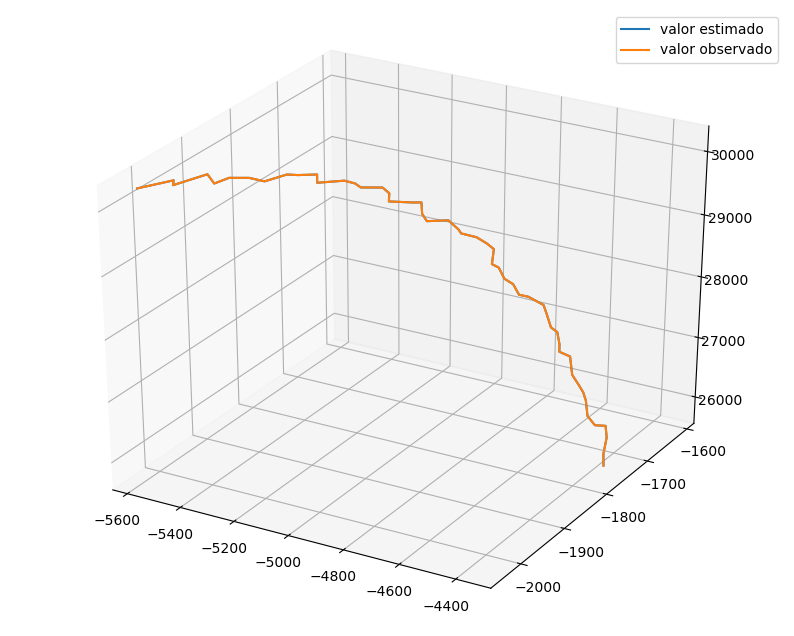

In [19]:
fig = plt.figure(figsize=(10,8), dpi= 100)
ax = fig.gca(projection='3d')

ax.plot(x_pred_uni[300:351], y_pred_uni[300:351], z_pred_uni[300:351], label='valor estimado')
ax.plot(x_obs[300:351], y_obs[300:351], z_obs[300:351], label='valor observado')

ax.legend()

plt.show()



In [20]:
# Posición inicial
x_k = np.array([-10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
    
# Matrix covarianza en la posición cero.
P_k = np.diag(np.array([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01]))

pred_normal_dos_va = []
obs = []
norma_P_dos = []



for i in range (0, 351):
    zk = np.concatenate([np.random.normal(0,10, size=3), np.random.normal(0,0.2, size=3)]) #Error distribución normal
    R  = np.identity(6) * np.concatenate([np.array([10,10,10]), np.array([0.2,0.2,0.2])])
    y_k_1 = X[i]
    x_k, P_k = prediccion_estado(i+1, x_k, P_k)
    y_k_1 = nueva_observacion_dos_variables (y_k_1, zk)
    x_k, K = actualizacion_medicion_dos_variables (P_k, R, x_k, y_k_1)
    P_k = actualizar_estimador_dos_variables (K, P_k)
    pred_normal_dos_va.append(x_k[0:3])
    obs.append(y_k_1[0:3])    
    norma_P_dos.append(np.linalg.norm(P_k))

In [21]:
x_pred_normal_dos_va = []
y_pred_normal_dos_va = []
z_pred_normal_dos_va = []

x_obs = []
y_obs = []
z_obs = []

for i in range(0,351):
    x_pred_normal_dos_va.append(pred_normal_dos_va[i][0])
    y_pred_normal_dos_va.append(pred_normal_dos_va[i][1])
    z_pred_normal_dos_va.append(pred_normal_dos_va[i][2])

   
    x_obs.append(obs[i][0])
    y_obs.append(obs[i][1])
    z_obs.append(obs[i][2])

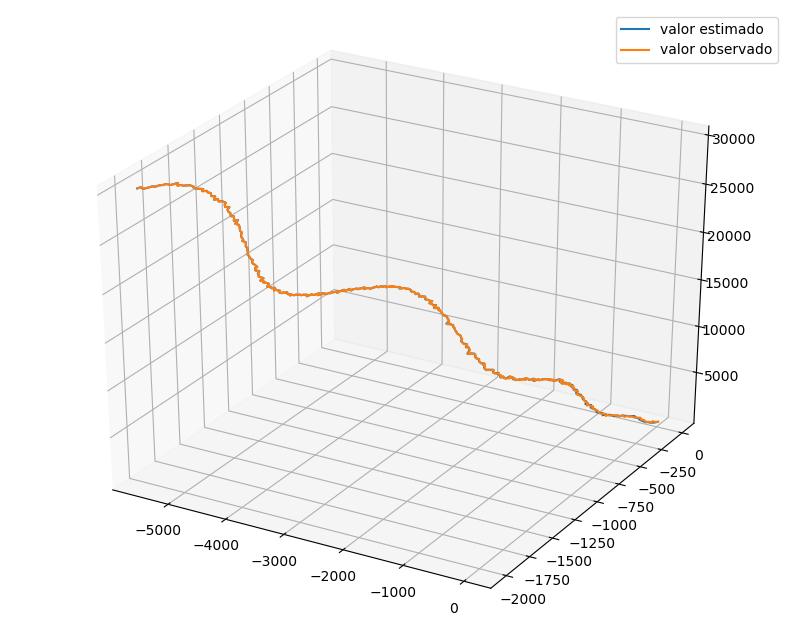

In [22]:
fig = plt.figure(figsize=(10,8), dpi= 100)
ax = fig.gca(projection='3d')
ax.plot(x_pred_normal_dos_va, y_pred_normal_dos_va, z_pred_normal_dos_va, label='valor estimado')
ax.plot(x_obs, y_obs, z_obs, label='valor observado')

ax.legend()

plt.show()

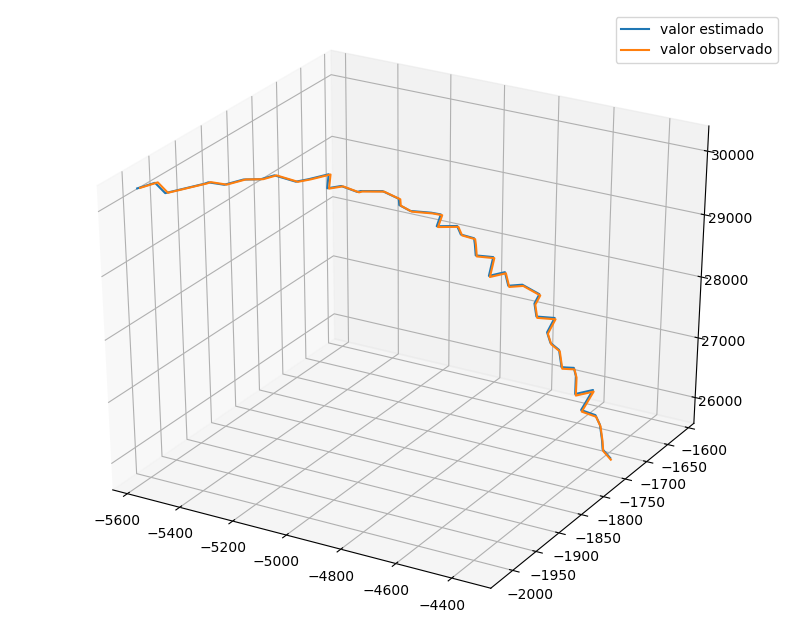

In [23]:
fig = plt.figure(figsize=(10,8), dpi= 100)
ax = fig.gca(projection='3d')
ax.plot(x_pred_normal_dos_va[300:351], y_pred_normal_dos_va[300:351], z_pred_normal_dos_va[300:351], label='valor estimado')
ax.plot(x_obs[300:351], y_obs[300:351], z_obs[300:351], label='valor observado')

ax.legend()

plt.show()

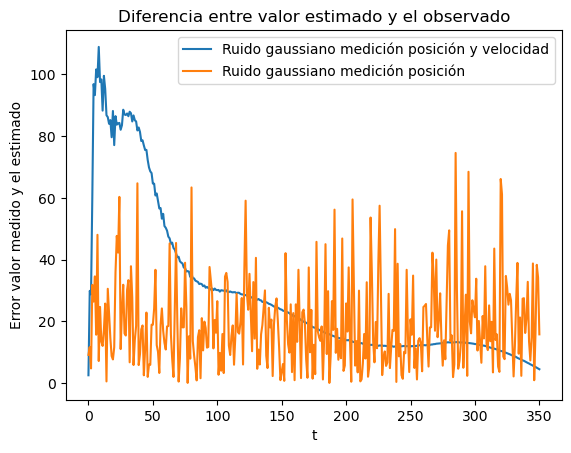

In [24]:
error_normal_dos_variables = (abs(np.sum(obs,axis=1) - np.sum(pred_normal_dos_va,axis=1)))
plt.plot(error_normal_dos_variables, label="Ruido gaussiano medición posición y velocidad")
plt.plot(error_normal, label="Ruido gaussiano medición posición")
plt.legend(loc="upper right")
plt.title("Diferencia entre valor estimado y el observado")
plt.xlabel("t")
plt.ylabel("Error valor medido y el estimado")
plt.show()